# Data Exploration 🔍

In [87]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import emoji
import seaborn as sns
import warnings

In [88]:
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data/cleaned_by_language.csv")

Explore ratio of words to emojis

In [10]:
en_df = df[df['language'] == 'en']
es_df = df[df['language'] == 'es']

emoji_count_en = en_df['emoji count'].sum()
emoji_count_es = es_df['emoji count'].sum()

word_count_en = en_df['word count'].sum()
word_count_es = es_df['word count'].sum()

In [11]:
print("ratio of emojis to words (english): ", emoji_count_en/word_count_en)
print("ratio of emojis to words (spanish): ", emoji_count_es/word_count_es)

ratio of emojis to words (english):  0.23325451546883383
ratio of emojis to words (spanish):  0.2549646807943489


Explore what emojis are used

In [93]:
def get_df_count(lang_df):
    emojis = {}

    # create dictionary
    for row in lang_df['emoji list']:
        for el in row:
            emojis[el] = emojis.setdefault(el, 0) + 1

    # remove bad chars
    to_remove = ["'", ',', ' ', '[', ']']
    for el in to_remove:
        del emojis[el]
        
    # make dataframe
    emoji_arr = []
    for key, value in emojis.items():
        emoji_arr.append([key, value])

    emoji_df = pd.DataFrame(emoji_arr, columns=['emoji', 'count'])
    emoji_df = emoji_df.sort_values(by='count', ascending=False)

    return emoji_df

In [94]:
en_df_count = get_df_count(en_df)
es_df_count = get_df_count(es_df)

['😂', '🔥', '❤', '👏', '🤣', '😍', '🙌', '🏻', '😢', '🌈', '😭', '💀', '⚽', '🏆', '🏳', '💪', '🙏', '👎', '🏼', '😅']


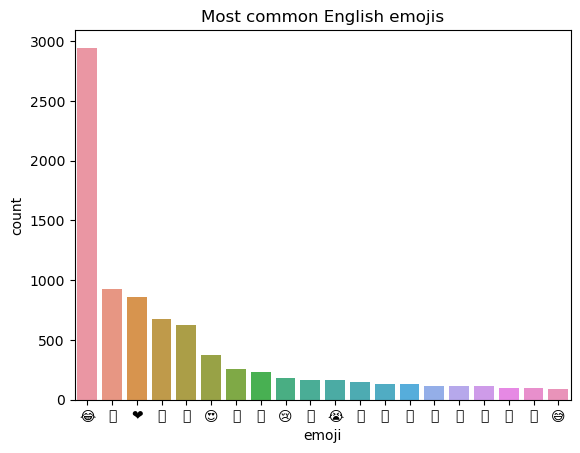

In [95]:
sns.barplot(en_df_count[:20], x='emoji', y='count').set(title='Most common English emojis')
print(list(en_df_count[:20]['emoji']))

['😂', '❤', '🔥', '👏', '🤣', '😍', '🙌', '💙', '⚽', '🏻', '💪', '😢', '🏼', '🏆', '😭', '👋', '🙏', '🤫', '💀', '🤍']


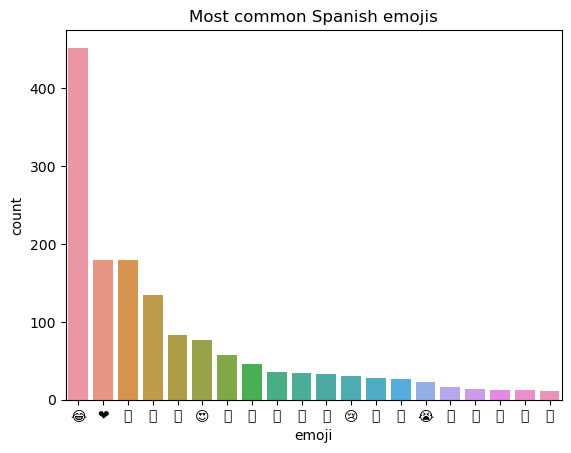

In [96]:
sns.barplot(es_df_count[:20], x='emoji', y='count').set(title='Most common Spanish emojis')
print(list(es_df_count[:20]['emoji']))